In [146]:
# Installing Validclust for Dunn Index

!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
# Importing all the required libraries

import pandas as pd
from sklearn.metrics.cluster import fowlkes_mallows_score
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from validclust import dunn
from sklearn.metrics import pairwise_distances
import matplotlib.cm as cm

In [148]:
#Reading the Dataset

df_world=pd.read_csv('/content/drive/MyDrive/FDA-Project1_data/World Indicators.csv')

In [149]:
# Calculating null values in each column

df_world.isna().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

### As "Energy Usage" and "Lending Interest" have many missing values we will neglect them while forming clusters.!!

In [150]:
# Dropping "Energy Usage" and "Lending Index".

df_world.drop(labels=['Energy Usage','Lending Interest'],axis=1,inplace=True)
df_world

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [151]:
# Removing '$',',' from all the price values and convert them to float/int

for i in df_world.columns:
  if(i=='Business Tax Rate'):
    for j in range(len(df_world[i])):
      try:
        if (float(df_world[i][j])):
          continue
      except:
        df_world[i][j]=float(df_world[i][j].replace('%',''))
  if(i=='Health Exp/Capita'):
    for j in range(len(df_world[i])):
      try:
        if (float(df_world[i][j])):
          continue
      except:
        df_world[i][j]=float(df_world[i][j].replace('$','').replace(',',''))
  elif(i=='GDP'):
    for j in range(len(df_world[i])):
      try:
        if (float(df_world[i][j])):
          continue
      except:
        df_world[i][j]=float(df_world[i][j].replace('$','').replace(',',''))
  else:
    continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

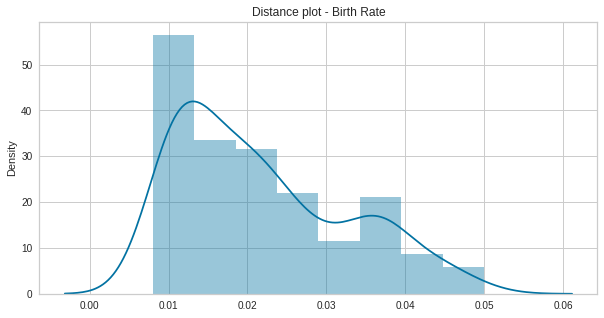

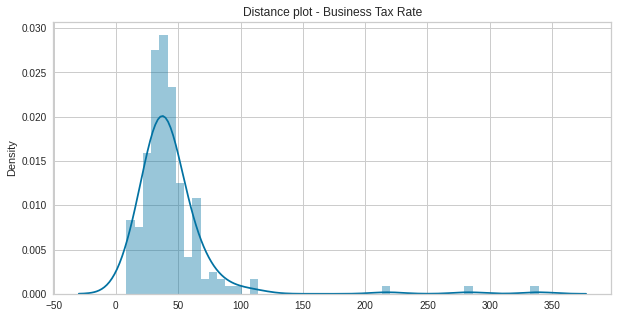

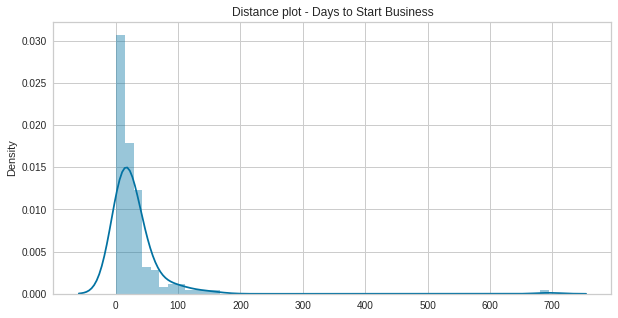

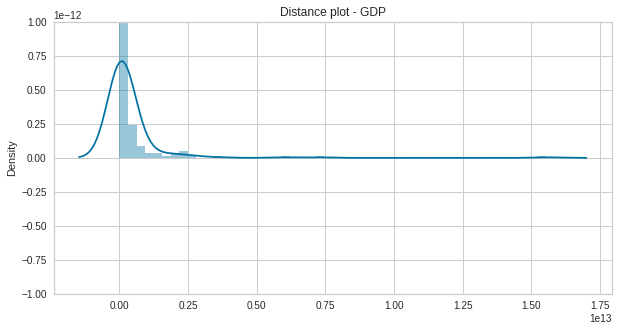

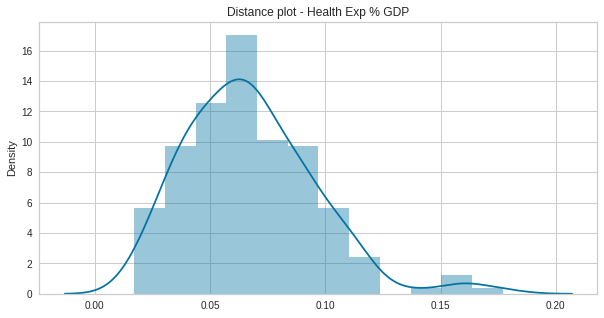

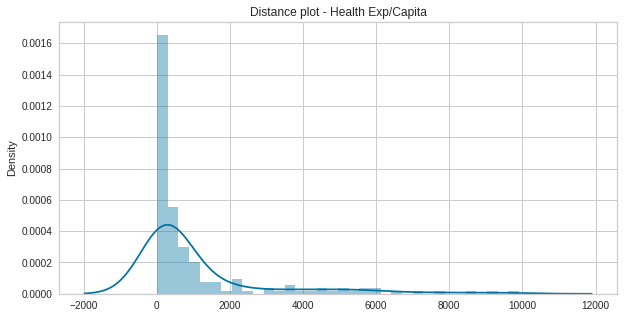

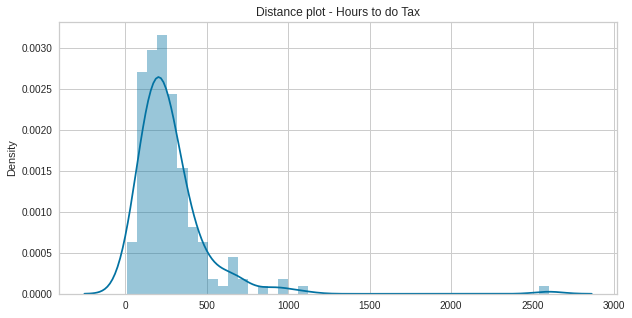

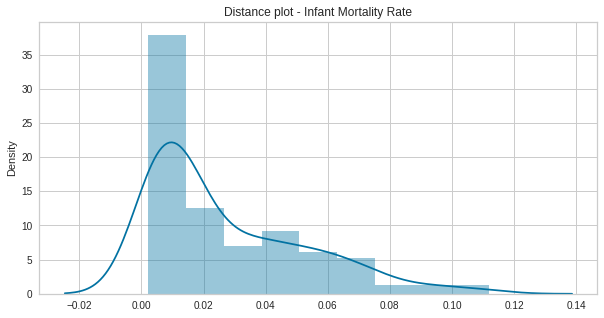

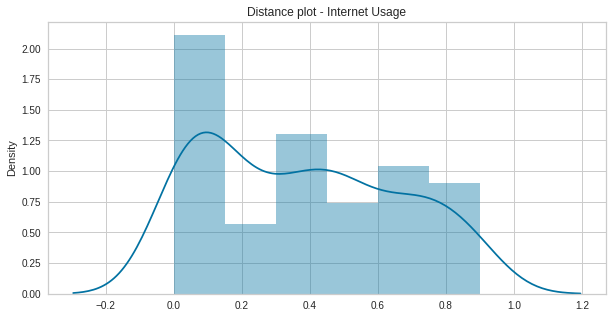

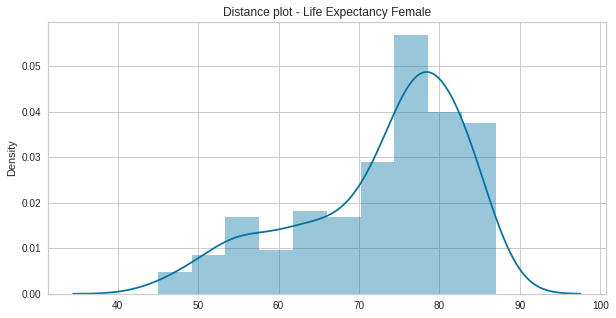

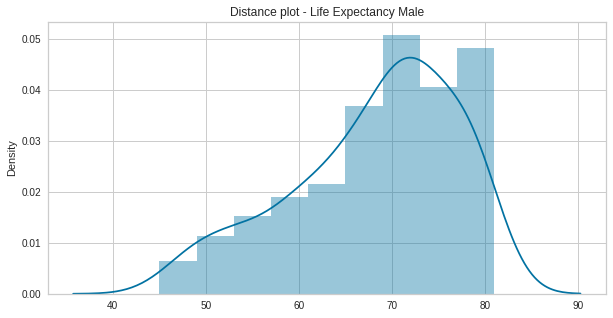

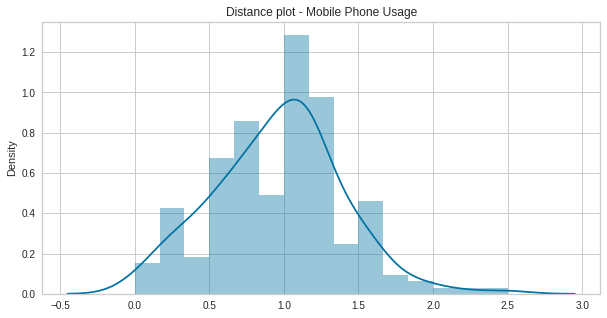

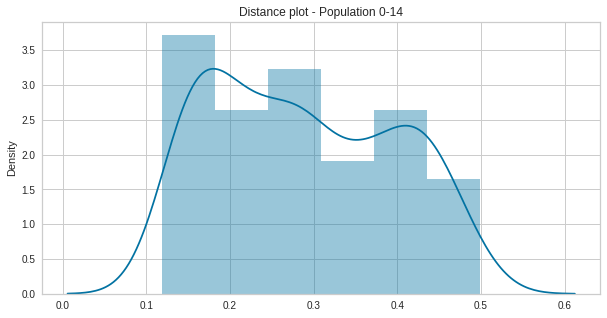

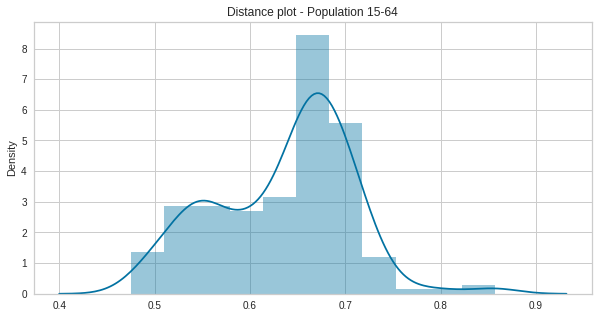

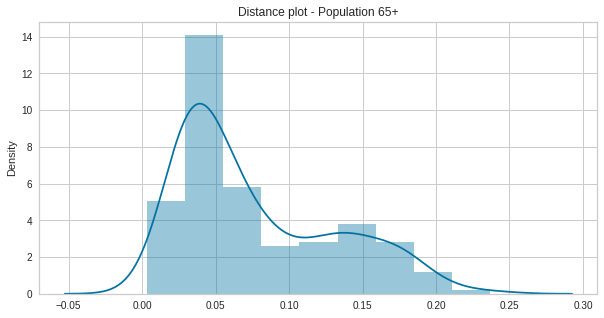

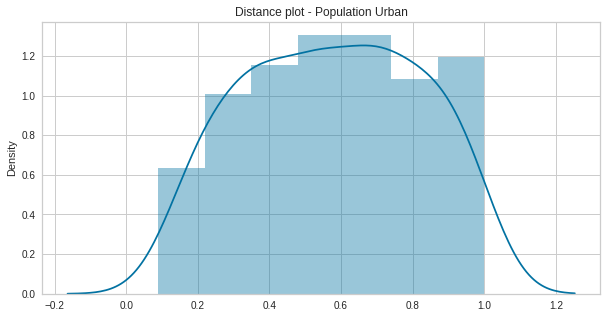

In [152]:
# Plotting distance plots for each column for deciding wheather to fill them with mean,median or mode.

for i in df_world.columns[0:-2]:
  fig=plt.figure(figsize=(10,5))
  plt.title('Distance plot - '+i)
  sns.distplot(df_world[i].values)

### **Based on these plots we will decide on which Central Tendency to choose to fill the missing values.**

In [153]:
# Filling missing values in each column relative to the Region['Continent'] they belong to. Only the mean of values belonging to that respective Continent
# were filled in the respective columns. 
for i in range(len(df_world.columns)-2):
  for j in range(len(df_world)):
    if (pd.isna(df_world.iloc[j,i]) and (i not in [0,5,7,9,13,14,15,17])):
      if(df_world.loc[j,"Region"]=='Africa'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['Africa']
      elif(df_world.loc[j,"Region"]=='Asia'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['Asia']
      elif(df_world.loc[j,"Region"]=='Europe'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['Europe']
      elif(df_world.loc[j,"Region"]=='Middle East'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['Middle East']
      elif(df_world.loc[j,"Region"]=='Oceania'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['Oceania']
      elif(df_world.loc[j,"Region"]=='The Americas'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].median()['The Americas']
      else:
        continue
    elif(pd.isna(df_world.iloc[j,i])):
      if(df_world.loc[j,"Region"]=='Africa'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['Africa']
      elif(df_world.loc[j,"Region"]=='Asia'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['Asia']
      elif(df_world.loc[j,"Region"]=='Europe'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['Europe']
      elif(df_world.loc[j,"Region"]=='Middle East'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['Middle East']
      elif(df_world.loc[j,"Region"]=='Oceania'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['Oceania']
      elif(df_world.loc[j,"Region"]=='The Americas'):
        df_world.iloc[j,i]=df_world.groupby(["Region"])[df_world.columns[i]].mean()['The Americas']
      else:
        continue



In [154]:
df_world.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638.0,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405.0,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431.0,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757.0,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480.0,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [155]:
# Normalizing the data using MinMaxScaler after removing the last two columns

scaler = preprocessing.MinMaxScaler()
names = df_world.columns
d = scaler.fit_transform(df_world.iloc[:,0:-2])
scaled_df = pd.DataFrame(d, columns=names[0:-2])
scaled_df['Region']=df_world.iloc[:,-2]
scaled_df['Country']=df_world.iloc[:,-1]
scaled_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933,Africa,Algeria
1,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262,Africa,Angola
2,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630,Africa,Benin
3,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503,Africa,Botswana
4,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194,Africa,Burkina Faso


### Getting the list of SSE,Silhouette Score and Calinski Harabasz Score for number of clusters rangig from 1 to 10.

In [156]:
SSE=[]                              # Sum of squared errors of k means models with no_of_clusters ranging from 1 to 10
ch=[]                               # Calinski_Harabasz_Score of k means models with no_of_clusters ranging from 1 to 10
sc=[]                               # Silhouette_Score of k means models with no_of_clusters ranging from 1 to 10
for i in range(1,10):
  mdl_cohesive = KMeans(n_clusters=i)
  mdl_cohesive.fit(scaled_df.iloc[:,0:-2])
  pred_lab=mdl_cohesive.labels_
  if(i != 1):
    ch.append(metrics.calinski_harabasz_score(scaled_df.iloc[:,0:-2],pred_lab))
    sc.append(metrics.silhouette_score(scaled_df.iloc[:,0:-2], pred_lab))
  SSE.append(mdl_cohesive.inertia_)
sse_dict={}
ch_dict={}
sc_dict={}
sse_dict['Number of Clusters']='SSE Values'
ch_dict['Number of Clusters']='CH Values'
sc_dict['Number of Clusters']='SC Values'
for i in range(1,len(SSE)):
  sse_dict[i+1]=SSE[i]
for i in range(2,10):
  ch_dict[i]=ch[i-2]
  sc_dict[i]=sc[i-2]
print('Sum of squared errors of k means models with no_of_clusters ranging from 1 to 10')
print(sse_dict)
print('Calinski_Harabasz_Score of k means models with no_of_clusters ranging from 1 to 10')
print(ch_dict)
print('Silhouette_Score of k means models with no_of_clusters ranging from 1 to 10')
print(sc_dict)
  

Sum of squared errors of k means models with no_of_clusters ranging from 1 to 10
{'Number of Clusters': 'SSE Values', 2: 67.66378407086023, 3: 52.09312156934258, 4: 44.2110851441618, 5: 40.362582832672786, 6: 37.673735094786636, 7: 35.55637848297481, 8: 33.32462805217136, 9: 32.499679278063965}
Calinski_Harabasz_Score of k means models with no_of_clusters ranging from 1 to 10
{'Number of Clusters': 'CH Values', 2: 221.70382812289623, 3: 173.92395847269358, 4: 148.0776942988339, 5: 125.8900976730875, 6: 110.25199401446403, 7: 98.86083111378639, 8: 91.87636360898783, 9: 82.65167416359253}
Silhouette_Score of k means models with no_of_clusters ranging from 1 to 10
{'Number of Clusters': 'SC Values', 2: 0.42486191624750347, 3: 0.30219929618165203, 4: 0.25315677142989196, 5: 0.24941673236108966, 6: 0.2070166342914785, 7: 0.1900939068443671, 8: 0.1948969800500721, 9: 0.17818305742507146}


### Optimum number of clusters using elbow method elbow method.

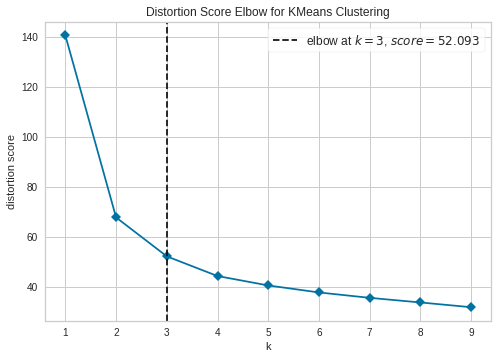

In [157]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(scaled_df.iloc[:,0:-2])
visualizer.show()

### Here we get the optimum number of clusters as 3. We can see that the distortion and inertia starts decreasing linearly after number of clusters=3. Even though the visualisation gives number of clusters as 3 , it is close call between no_of_clusters=2 and no_of_clusters=3.
### We can't solely depend on Elbow method .i.e. Sum of Squared errors. We will also look at Silhouette Score to decide on the number of clusters.

### Silhouette Score calculation and visualisation for calculating optimum number of clusters.

For n_clusters = 2 The average silhouette_score is : 0.42486191624750347
For n_clusters = 3 The average silhouette_score is : 0.30219929618165203
For n_clusters = 4 The average silhouette_score is : 0.25494299973193235
For n_clusters = 5 The average silhouette_score is : 0.24680684789625487
For n_clusters = 6 The average silhouette_score is : 0.22796603160756984


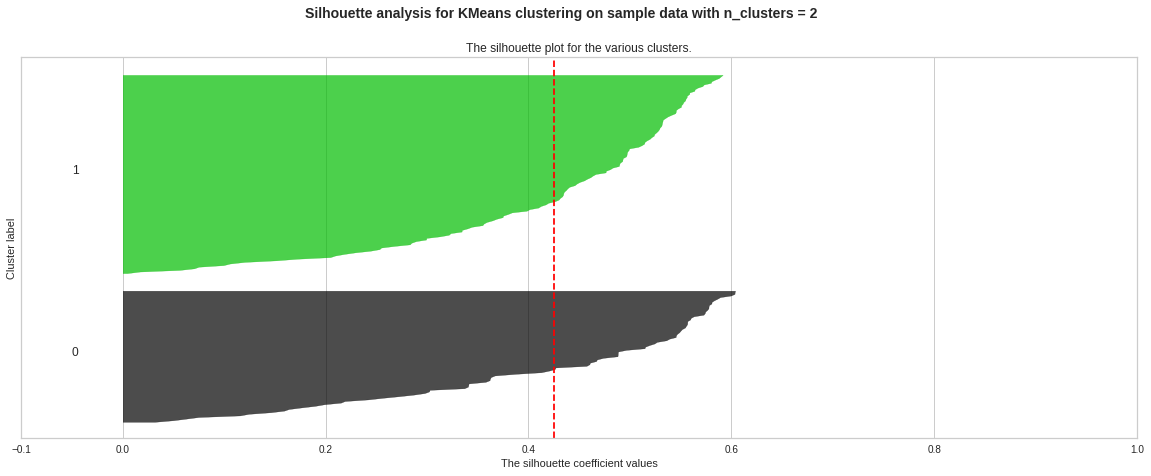

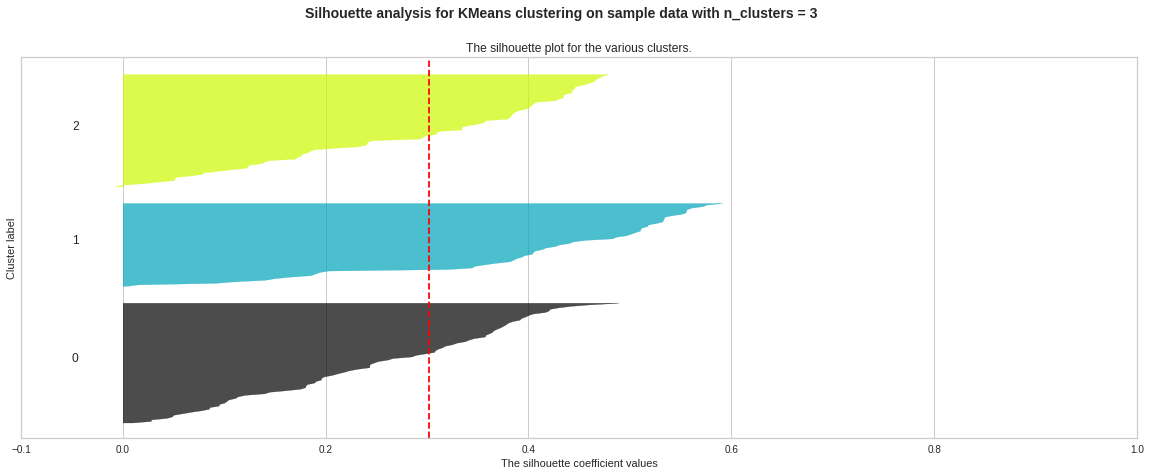

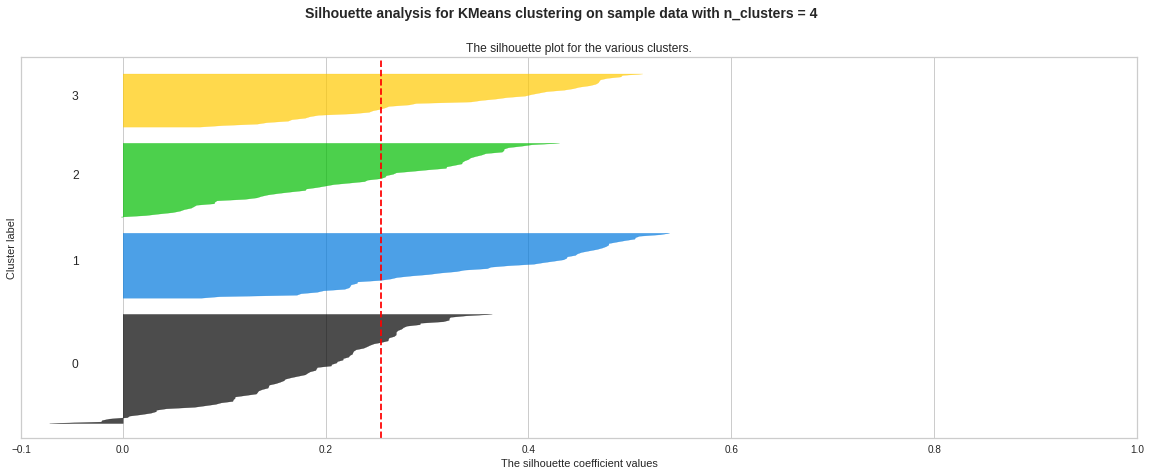

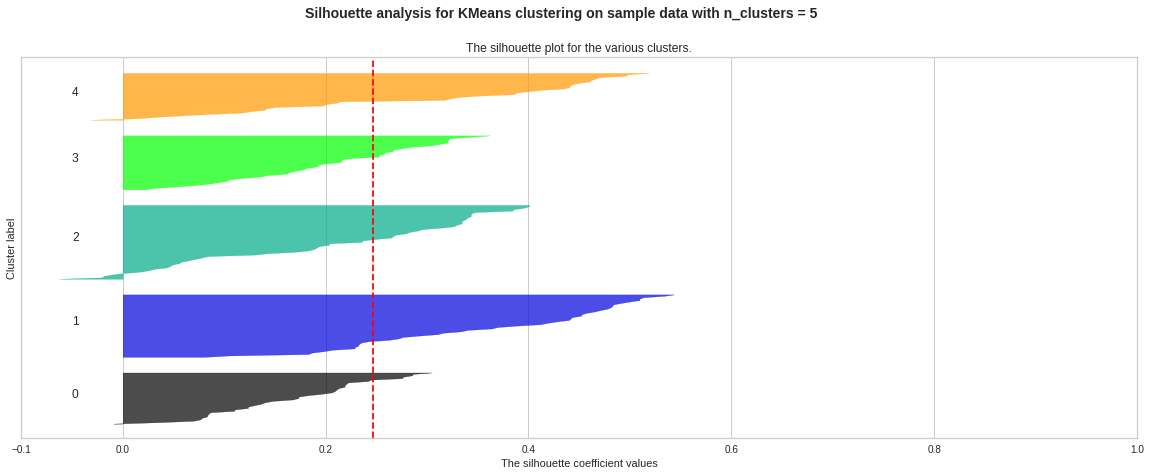

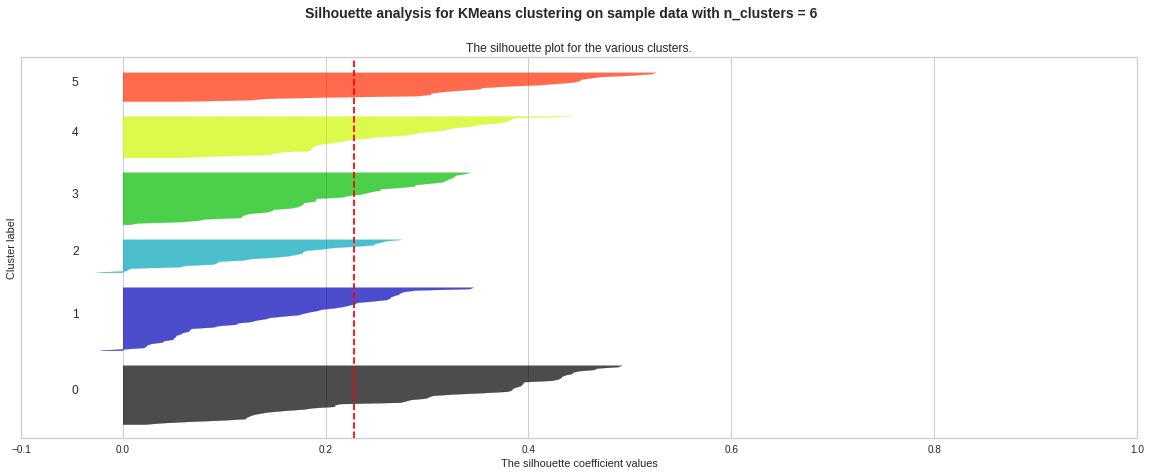

Text(0.5, 1.0, 'Sc_Score varying with number of clusters')

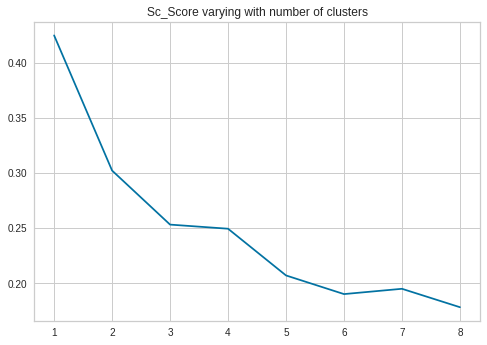

In [158]:
X=scaled_df.iloc[:,0:-2]      ## to find the optimum number of clusters((this reference is given by the professor to find the optimum number of clusters))
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(20,7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
sns.lineplot(y=sc,x=range(1,len(sc)+1)).set_title('Sc_Score varying with number of clusters')

### From Silhouette Score analysis we get that the SC score is maximum for number of clusters=2 ,i.e. 
### For n_clusters = 2 The average silhouette_score is : 0.42486191624750347 which is greater than all the other values.

### From here we get the number of clusters is 2

In [159]:
number_of_clusters=2

### Performing K-Means Clustering with number of clusters as 2

In [160]:
# K-Means Clustering And Calculating Sum of squared error, SC Score, CH Score and Dunn index for number of clusters=2

mdl_data2=KMeans(n_clusters=number_of_clusters)
mdl_data2.fit(scaled_df.iloc[:,0:-2])
predicted_labels=mdl_data2.labels_
df_predicted=scaled_df.copy(deep=True)
df_predicted["Cluster"]=predicted_labels
print('SSE_MDL2 for K-Means: '+ str(mdl_data2.inertia_))
print('SC score for K-Means: '+ str(metrics.silhouette_score(scaled_df.iloc[:,0:-2], predicted_labels)))
print('CH score for K-Means: '+ str(metrics.calinski_harabasz_score(scaled_df.iloc[:,0:-2],predicted_labels)))
distance = pairwise_distances(scaled_df.iloc[:,0:-2])
dunn_index = dunn(distance,predicted_labels)
print('Dunn Index for World Indicators Dataset[K-means]: '+ str(dunn_index))

SSE_MDL2 for K-Means: 67.66378407086023
SC score for K-Means: 0.42486191624750347
CH score for K-Means: 221.70382812289623
Dunn Index for World Indicators Dataset[K-means]: 0.12048730766930328


In [161]:
# Printing counteries and their corresponding regions in Cluster 1 according to K-Means
print('Countries and Regions belonging to Cluster 1 according to K-Means:')
clusters_kmeans=[]
for j in range(len(df_predicted)):
  c=[]
  if(df_predicted.iloc[j,-1]==0):
    print(df_predicted.iloc[j,-3:-1].values)
    c.append(df_predicted.iloc[j,-3:-1].values)
clusters_kmeans.append(c)

Countries and Regions belonging to Cluster 1 according to K-Means:
['Africa' 'Egypt, Arab Rep.']
['Africa' 'Libya']
['Africa' 'Mauritius']
['Africa' 'Morocco']
['Africa' 'Seychelles']
['Africa' 'Tunisia']
['Asia' 'Armenia']
['Asia' 'Azerbaijan']
['Asia' 'Brunei Darussalam']
['Asia' 'China']
['Asia' 'Georgia']
['Asia' 'Hong Kong SAR, China']
['Asia' 'Japan']
['Asia' 'Kazakhstan']
['Asia' 'Korea, Dem. Rep.']
['Asia' 'Korea, Rep.']
['Asia' 'Macao SAR, China']
['Asia' 'Malaysia']
['Asia' 'Maldives']
['Asia' 'Singapore']
['Asia' 'Sri Lanka']
['Asia' 'Thailand']
['Asia' 'Vietnam']
['Europe' 'Albania']
['Europe' 'Andorra']
['Europe' 'Austria']
['Europe' 'Belarus']
['Europe' 'Belgium']
['Europe' 'Bosnia and Herzegovina']
['Europe' 'Bulgaria']
['Europe' 'Croatia']
['Europe' 'Cyprus']
['Europe' 'Czech Republic']
['Europe' 'Denmark']
['Europe' 'Estonia']
['Europe' 'Faeroe Islands']
['Europe' 'Finland']
['Europe' 'France']
['Europe' 'Germany']
['Europe' 'Greece']
['Europe' 'Hungary']
['Europe' 'Ic

In [162]:
# Printing counteries and their corresponding regions in Cluster 2 according to K-Means
print('Countries and Regions belonging to Cluster 2 according to K-Means:')
for j in range(len(df_predicted)):
  c=[]
  if(df_predicted.iloc[j,-1]==1):
    print(df_predicted.iloc[j,-3:-1].values)
    c.append(df_predicted.iloc[j,-3:-1].values)
clusters_kmeans.append(c)

Countries and Regions belonging to Cluster 2 according to K-Means:
['Africa' 'Algeria']
['Africa' 'Angola']
['Africa' 'Benin']
['Africa' 'Botswana']
['Africa' 'Burkina Faso']
['Africa' 'Burundi']
['Africa' 'Cameroon']
['Africa' 'Central African Republic']
['Africa' 'Chad']
['Africa' 'Comoros']
['Africa' 'Congo, Dem. Rep.']
['Africa' 'Congo, Rep.']
['Africa' "Cote d'Ivoire"]
['Africa' 'Djibouti']
['Africa' 'Equatorial Guinea']
['Africa' 'Eritrea']
['Africa' 'Ethiopia']
['Africa' 'Gabon']
['Africa' 'Gambia, The']
['Africa' 'Ghana']
['Africa' 'Guinea']
['Africa' 'Guinea-Bissau']
['Africa' 'Kenya']
['Africa' 'Lesotho']
['Africa' 'Liberia']
['Africa' 'Madagascar']
['Africa' 'Malawi']
['Africa' 'Mali']
['Africa' 'Mauritania']
['Africa' 'Mozambique']
['Africa' 'Namibia']
['Africa' 'Niger']
['Africa' 'Nigeria']
['Africa' 'Rwanda']
['Africa' 'Sao Tome and Principe']
['Africa' 'Senegal']
['Africa' 'Sierra Leone']
['Africa' 'Somalia']
['Africa' 'South Africa']
['Africa' 'South Sudan']
['Africa' '

### Performing Hierarchical Clustering with number of clusters as 2. As we have already found out the optimum number of clusters we do not need to do that again here.

In [163]:
# Hierarchical Clustering
df_hier=scaled_df.copy(deep=True)
df_hier=df_hier.iloc[:,0:-2]
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hier_pred=hc.fit_predict(df_hier)                                        # Predicted labels

In [164]:
sc_score_hier=(metrics.silhouette_score(df_hier, hier_pred))
ch_score=metrics.calinski_harabasz_score(df_hier,hier_pred)
print('SC score for Hierarchical: '+ str(sc_score_hier))
print('CH score for Hierarchical: '+ str(ch_score))
distance_hier = pairwise_distances(df_hier)
dunn_index_hier = dunn(distance_hier,hier_pred)
print('Dunn Index for World Indicators Dataset[Hierarchical]: '+ str(dunn_index_hier))

SC score for Hierarchical: 0.38974114072228505
CH score for Hierarchical: 143.05821036209096
Dunn Index for World Indicators Dataset[Hierarchical]: 0.1525719075989017


In [165]:
# Predicted data-frame with cluster labels generated after Hierarchical clustering

pred_hier_df=scaled_df.copy(deep=True)
pred_hier_df['Cluster_Labels']=hier_pred
pred_hier_df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,Cluster_Labels
0,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933,Africa,Algeria,0
1,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262,Africa,Angola,1
2,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630,Africa,Benin,1
3,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503,Africa,Botswana,0
4,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194,Africa,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.229965,0.099184,0.025974,0.001522,0.31875,0.092083,0.090031,0.132468,0.444444,0.771673,0.750000,0.40,0.402632,0.456912,0.328829,0.897914,The Americas,Turks and Caicos Islands,0
204,0.119048,0.115210,0.005772,1.000000,1.00000,0.854386,0.067620,0.036364,0.777778,0.857143,0.861111,0.36,0.205263,0.507853,0.555556,0.790340,The Americas,United States,0
205,0.166667,0.101300,0.008658,0.003030,0.44375,0.121362,0.125193,0.072727,0.555556,0.833333,0.777778,0.56,0.273684,0.426702,0.581197,0.940724,The Americas,Uruguay,0
206,0.285714,0.164500,0.202020,0.020363,0.17500,0.047999,0.329212,0.109091,0.444444,0.761905,0.722222,0.40,0.452632,0.460733,0.235043,0.877058,The Americas,"Venezuela, RB",0


In [166]:
# Printing counteries and their corresponding regions in Cluster 1 according to Hierarchical

print('Countries and Regions belonging to Cluster 1 according to Hierarchical:')
clusters_hier=[]
for j in range(len(pred_hier_df)):
  c=[]
  if(pred_hier_df.iloc[j,-1]==0):
    print(pred_hier_df.iloc[j,-3:-1].values)
    c.append(pred_hier_df.iloc[j,-3:-1].values)
clusters_hier.append(c)

Countries and Regions belonging to Cluster 1 according to Hierarchical:
['Africa' 'Algeria']
['Africa' 'Botswana']
['Africa' 'Congo, Rep.']
['Africa' 'Djibouti']
['Africa' 'Egypt, Arab Rep.']
['Africa' 'Gabon']
['Africa' 'Liberia']
['Africa' 'Libya']
['Africa' 'Mauritius']
['Africa' 'Morocco']
['Africa' 'Namibia']
['Africa' 'Seychelles']
['Africa' 'South Africa']
['Africa' 'Tunisia']
['Asia' 'Armenia']
['Asia' 'Azerbaijan']
['Asia' 'Bangladesh']
['Asia' 'Bhutan']
['Asia' 'Brunei Darussalam']
['Asia' 'Cambodia']
['Asia' 'China']
['Asia' 'Georgia']
['Asia' 'Hong Kong SAR, China']
['Asia' 'India']
['Asia' 'Indonesia']
['Asia' 'Japan']
['Asia' 'Kazakhstan']
['Asia' 'Korea, Dem. Rep.']
['Asia' 'Korea, Rep.']
['Asia' 'Kyrgyz Republic']
['Asia' 'Lao PDR']
['Asia' 'Macao SAR, China']
['Asia' 'Malaysia']
['Asia' 'Maldives']
['Asia' 'Mongolia']
['Asia' 'Myanmar']
['Asia' 'Nepal']
['Asia' 'Pakistan']
['Asia' 'Philippines']
['Asia' 'Singapore']
['Asia' 'Sri Lanka']
['Asia' 'Tajikistan']
['Asia' 'T

In [167]:
# Printing counteries and their corresponding regions in Cluster 2 according to Hierarchical
print('Countries and Regions belonging to Cluster 2 according to Hierarchical:')
for j in range(len(pred_hier_df)):
  c=[]
  if(pred_hier_df.iloc[j,-1]==1):
    print(pred_hier_df.iloc[j,-3:-1].values)
    c.append(pred_hier_df.iloc[j,-3:-1].values)
clusters_hier.append(c)

Countries and Regions belonging to Cluster 2 according to Hierarchical:
['Africa' 'Angola']
['Africa' 'Benin']
['Africa' 'Burkina Faso']
['Africa' 'Burundi']
['Africa' 'Cameroon']
['Africa' 'Central African Republic']
['Africa' 'Chad']
['Africa' 'Comoros']
['Africa' 'Congo, Dem. Rep.']
['Africa' "Cote d'Ivoire"]
['Africa' 'Equatorial Guinea']
['Africa' 'Eritrea']
['Africa' 'Ethiopia']
['Africa' 'Gambia, The']
['Africa' 'Ghana']
['Africa' 'Guinea']
['Africa' 'Guinea-Bissau']
['Africa' 'Kenya']
['Africa' 'Lesotho']
['Africa' 'Madagascar']
['Africa' 'Malawi']
['Africa' 'Mali']
['Africa' 'Mauritania']
['Africa' 'Mozambique']
['Africa' 'Niger']
['Africa' 'Nigeria']
['Africa' 'Rwanda']
['Africa' 'Sao Tome and Principe']
['Africa' 'Senegal']
['Africa' 'Sierra Leone']
['Africa' 'Somalia']
['Africa' 'South Sudan']
['Africa' 'Sudan']
['Africa' 'Swaziland']
['Africa' 'Tanzania']
['Africa' 'Togo']
['Africa' 'Uganda']
['Africa' 'Zambia']
['Africa' 'Zimbabwe']
['Asia' 'Afghanistan']
['Asia' 'Timor-L

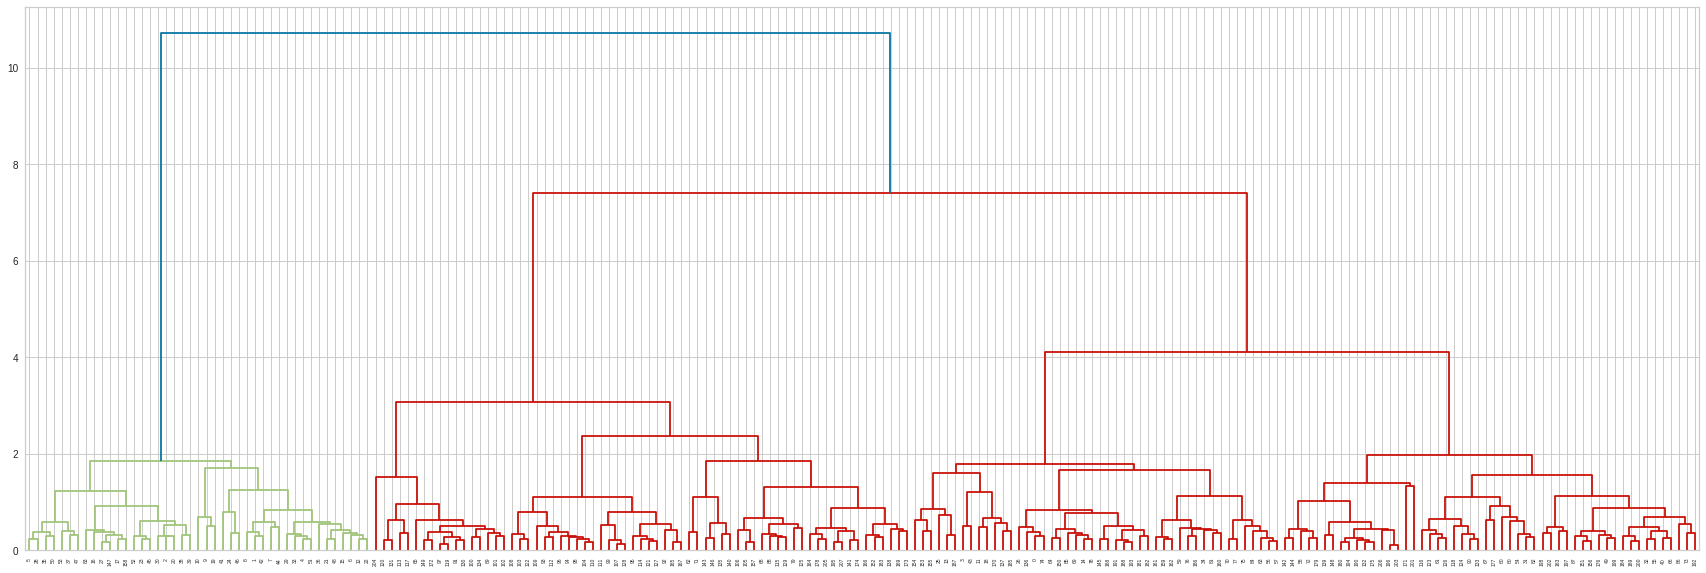

In [176]:
# Dendogram representation of Hierarchical clustering

fig=plt.figure(figsize=(30,10))
dendrogram=sch.dendrogram(sch.linkage(df_hier.values,method='ward'))

# **We can see that Dunn index in Hierarchical Clustering[0.15257] is greater than that of k-means[0.12048] . Greater the Dunn Index better the clustering solution.A higher Dunn index indicates less intra-cluster distance[Clusters are tightly packed] and high inter-cluster distance[Clusters are far away from one away].Therefore, Based on Dunn index alone we say that Hierarchical Clustering provided a slightly better clustering solution relative to k-means.**

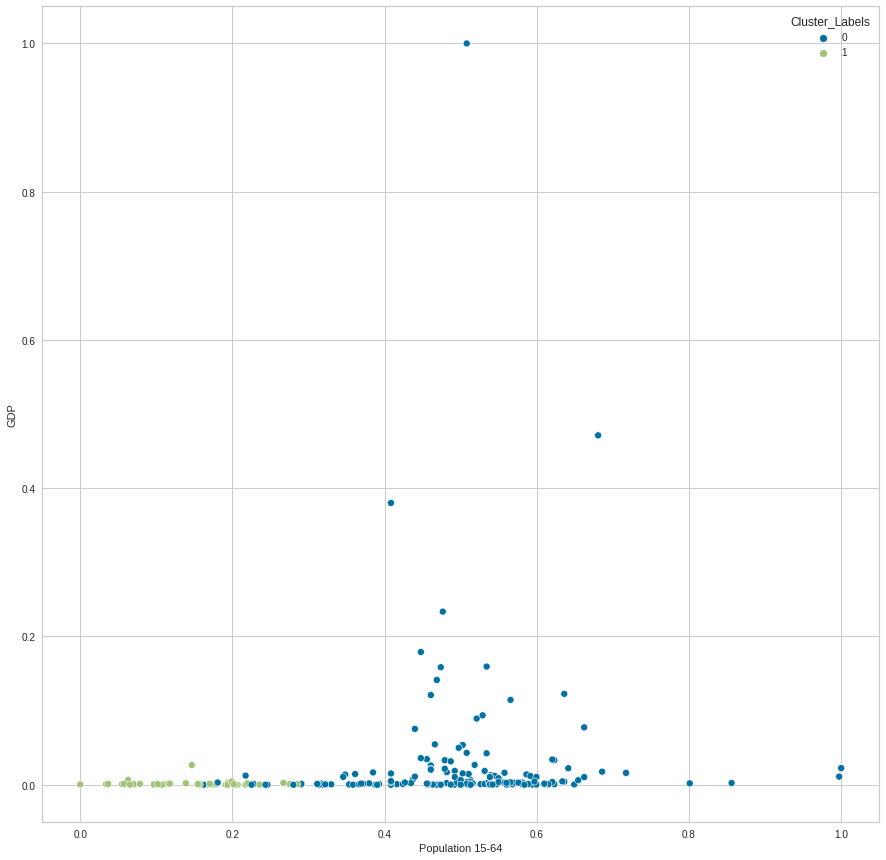

In [169]:
# Plotting GDP vs Population 15-64 for Hierarchical clustering

fig=plt.figure(figsize=(15,15))
sns.scatterplot(x='Population 15-64', y='GDP',data=pred_hier_df, hue=pred_hier_df.columns[-1])

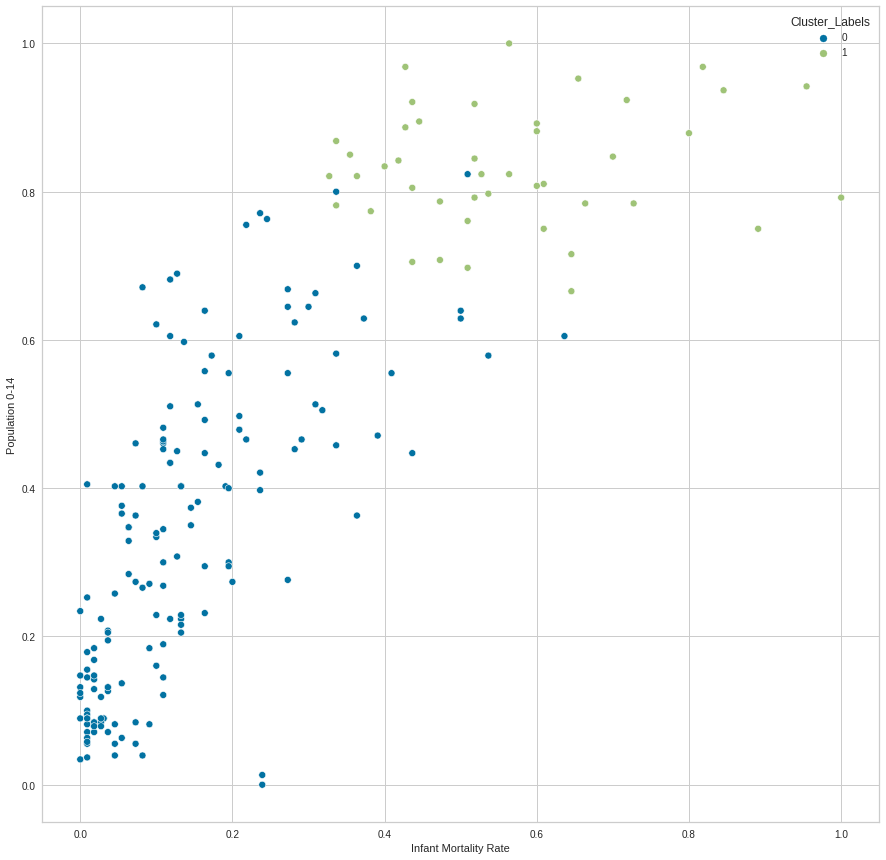

In [170]:
# Plotting Infant Mortality Rate vs Population 0-14 for Hierarchical clustering

fig=plt.figure(figsize=(15,15))
sns.scatterplot(x='Infant Mortality Rate', y='Population 0-14',data=pred_hier_df, hue=pred_hier_df.columns[-1])

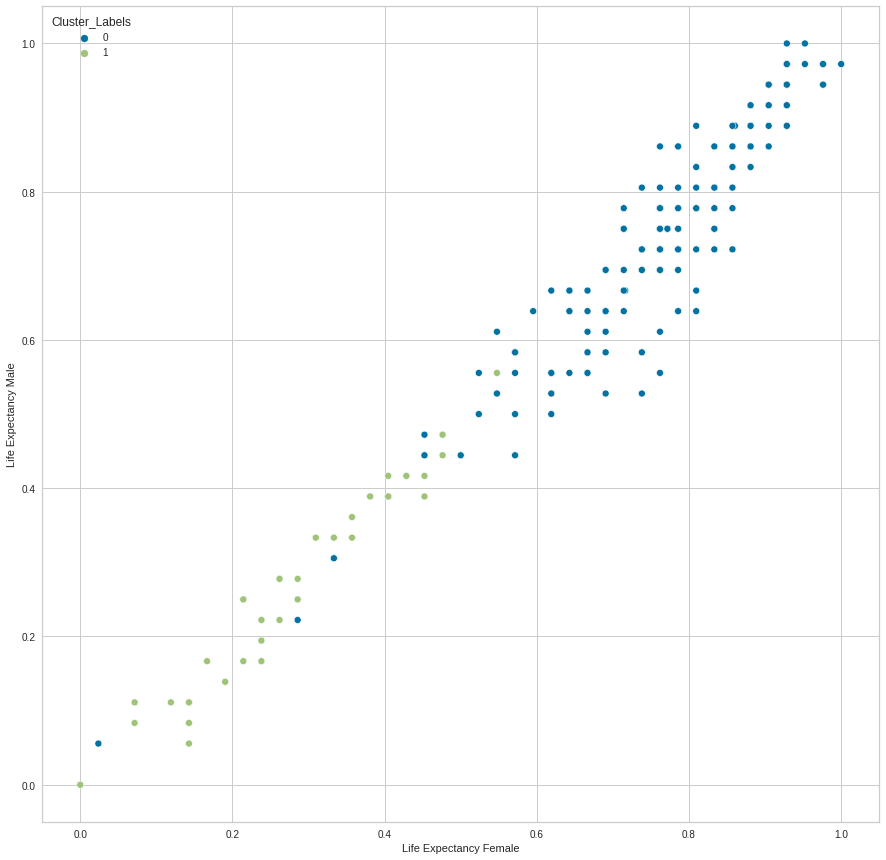

In [171]:
# Plotting Life Expectancy Female vs Life Expectancy Male for Hierarchical clustering

fig=plt.figure(figsize=(15,15))
sns.scatterplot(x='Life Expectancy Female', y='Life Expectancy Male',data=pred_hier_df, hue=pred_hier_df.columns[-1])

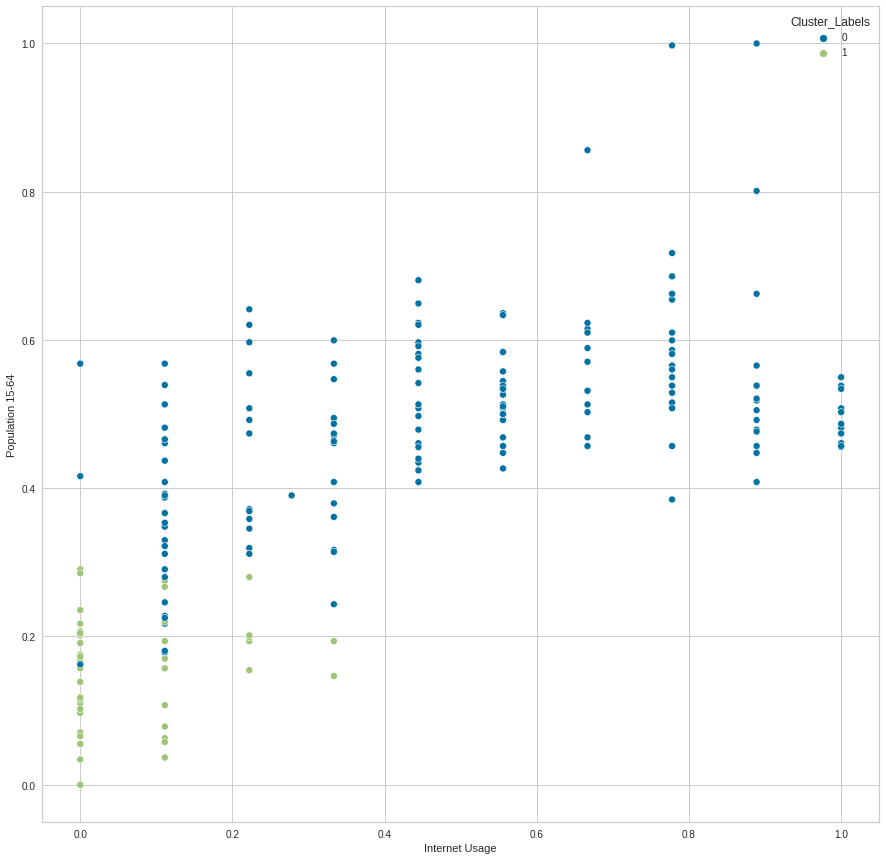

In [177]:
# Plotting Internet Usage vs Population 15-64 for Hierarchical clustering

fig=plt.figure(figsize=(15,15))
sns.scatterplot(x='Internet Usage', y='Population 15-64',data=pred_hier_df, hue=pred_hier_df.columns[-1])